# Formação Cientista de Dados
### Deep Learning

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11493376/11490434 [==============================] - 6s 1us/step


Text(0.5, 1.0, '0')

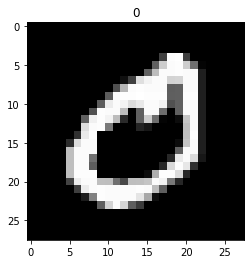

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4463 - accuracy: 0.8634 - val_loss: 0.1805 - val_accuracy: 0.9444
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2343 - accuracy: 0.9324 - val_loss: 0.1381 - val_accuracy: 0.9589
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1905 - accuracy: 0.9450 - val_loss: 0.1260 - val_accuracy: 0.9634
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1643 - accuracy: 0.9521 - val_loss: 0.1147 - val_accuracy: 0.9652
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1487 - accuracy: 0.9560 - val_loss: 0.0999 - val_accuracy: 0.9708
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1372 - accuracy: 0.9591 - val_loss: 0.1007 - val_accuracy: 0.9709
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1315 - accuracy: 0.9611 - val_loss: 0.0958 - val_accurac

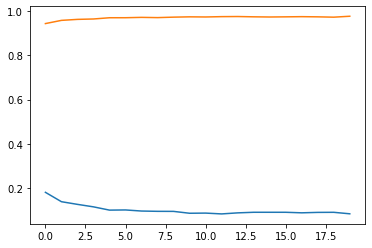

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[7.3371105e-09, 1.7563657e-08, 5.6835579e-06, ..., 9.9997067e-01,
        1.1605076e-09, 1.6235714e-05],
       [1.7798657e-13, 8.5085980e-05, 9.9991488e-01, ..., 3.7495798e-09,
        8.1755464e-11, 3.7706251e-11],
       [1.0333050e-11, 9.9999785e-01, 1.9125757e-07, ..., 1.2719565e-06,
        6.2203350e-07, 5.8830123e-09],
       ...,
       [1.4081355e-13, 7.2511575e-10, 2.0232241e-11, ..., 1.1223066e-08,
        4.8607673e-09, 5.5419935e-07],
       [1.6803011e-13, 8.5597390e-11, 1.5092182e-12, ..., 1.6706014e-14,
        1.2545560e-07, 2.7558085e-09],
       [3.8039122e-13, 6.5235809e-15, 1.5612355e-13, ..., 9.7900264e-23,
        1.4775618e-13, 6.6448715e-21]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 972,    0,    0,    0,    0,    0,    4,    1,    3,    0],
       [   0, 1124,    3,    1,    0,    0,    2,    1,    4,    0],
       [   3,    0, 1012,    4,    2,    0,    2,    6,    3,    0],
       [   1,    0,    3,  987,    0,    5,    0,    6,    5,    3],
       [   1,    0,    4,    0,  962,    0,    8,    1,    0,    6],
       [   3,    0,    0,    9,    2,  866,    3,    1,    7,    1],
       [   3,    3,    0,    1,    3,    3,  940,    0,    5,    0],
       [   2,    1,    9,    6,    2,    0,    0, 1004,    1,    3],
       [   6,    3,    3,    4,    5,    3,    3,    3,  939,    5],
       [   3,    3,    0,    5,   15,    4,    0,    7,    2,  970]],
      dtype=int64)

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]